In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('car_price.csv')

### Explore Data

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [4]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [5]:
df.sample()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
392,45793973,11900,1677,FORD,Transit,2003,Microbus,Yes,Diesel,2.0 Turbo,195000 km,6,Manual,Front,2-Mar,Left wheel,Yellow,4


In [6]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,4-May,Left wheel,White,12


In [7]:
df.shape

(19237, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod_year         19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [9]:
df.describe()

,ID,Price,Prod_year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [10]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [11]:
df.duplicated().sum()

313

In [12]:
# remove duplicated data
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(18924, 18)

In [14]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [15]:
df['Manufacturer'].value_counts().sort_values(ascending=True)

Manufacturer
GREATWALL           1
LANCIA              1
HAVAL               1
LAMBORGHINI         1
ASTON MARTIN        1
                 ... 
CHEVROLET        1047
FORD             1088
MERCEDES-BENZ    2043
TOYOTA           3606
HYUNDAI          3729
Name: count, Length: 65, dtype: int64

Analysis

In [16]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [17]:
# By Mohamed Jamyl
def number_unique_columns(data):
    for i in data.columns:
        print(f'{i} : {df[i].nunique()}')

In [18]:
number_unique_columns(data=df)

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod_year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


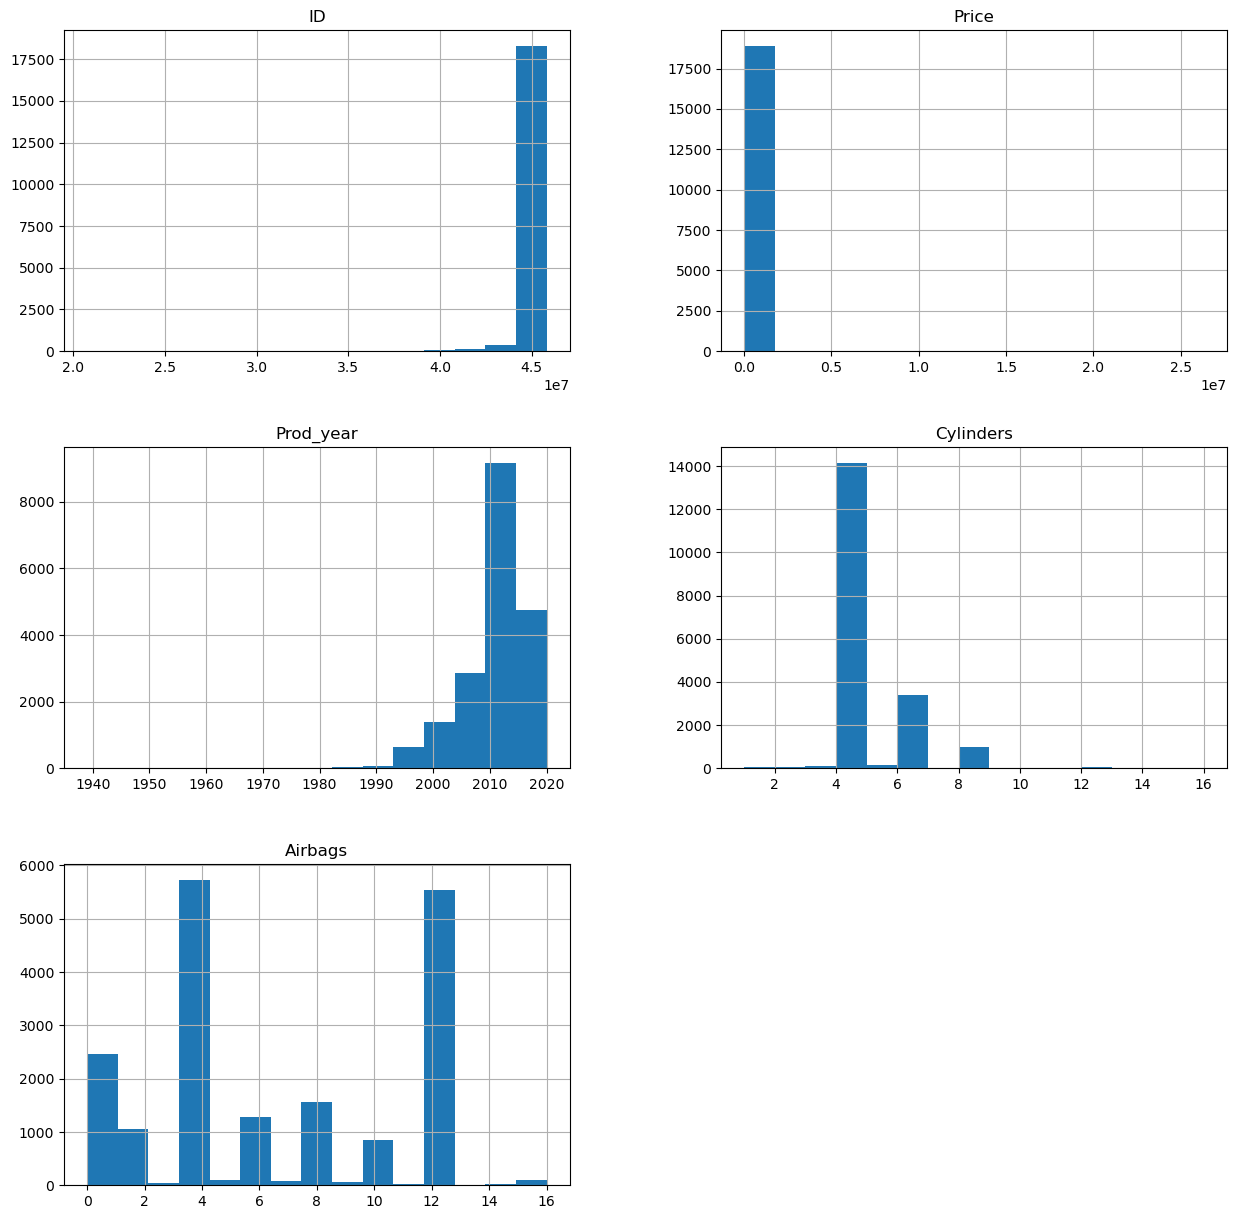

In [19]:
df.hist(bins=15,figsize=(15,15))
plt.show()

In [20]:
top10=df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

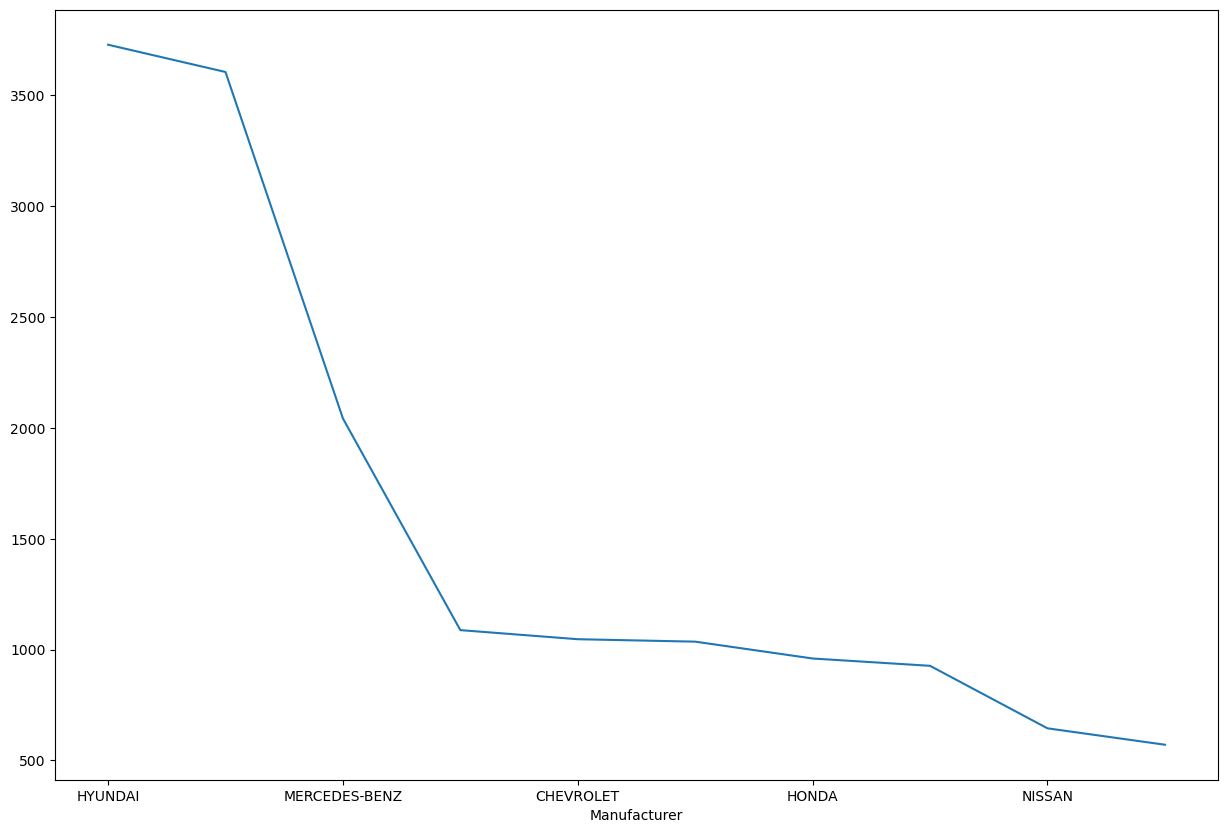

In [21]:
top10.plot(figsize=(15,10))

In [22]:
top10MeanPrices=[df[df['Manufacturer']==i]['Price'].mean() for i in list(top10.index)]
top10MeanPrices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

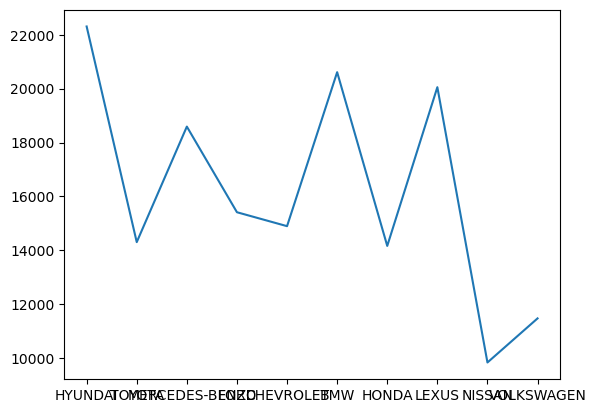

In [23]:
plt.plot(top10.index,top10MeanPrices)

In [24]:
obj = df.select_dtypes(include='object')
non_obj= df.select_dtypes(exclude='object')

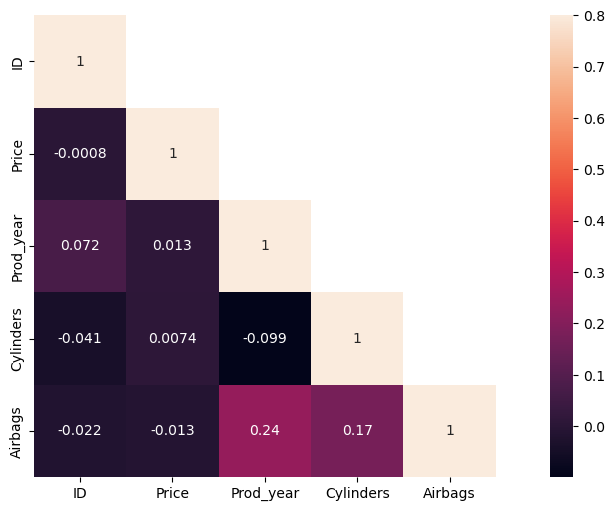

In [25]:
corrMatt = non_obj.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,6)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

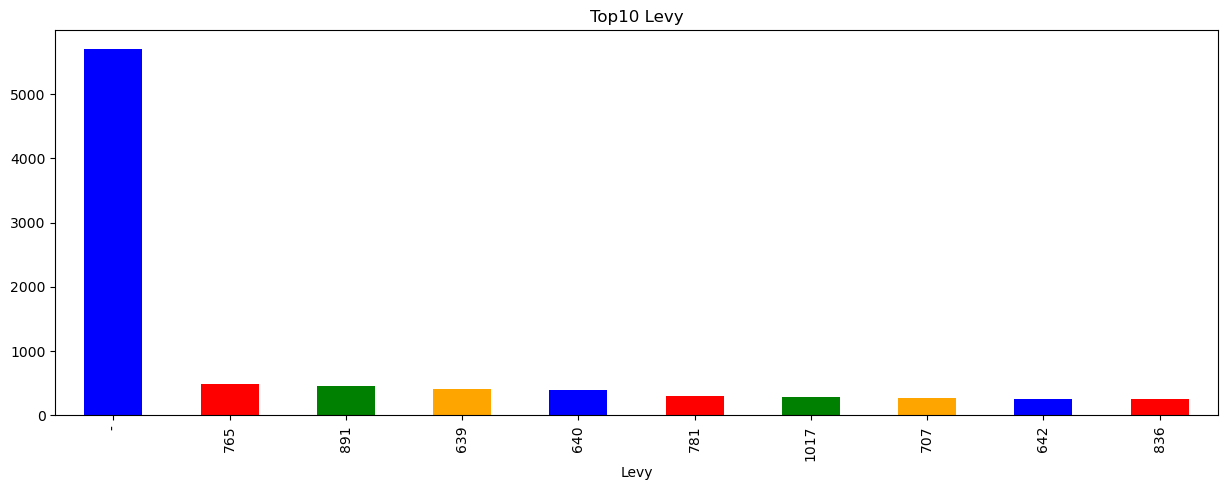

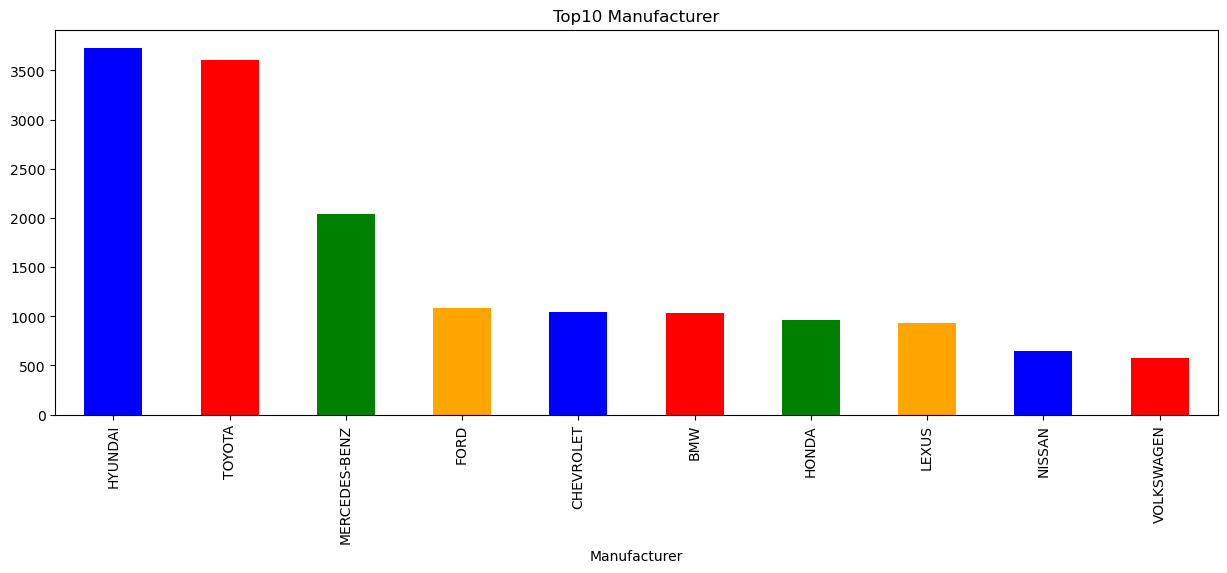

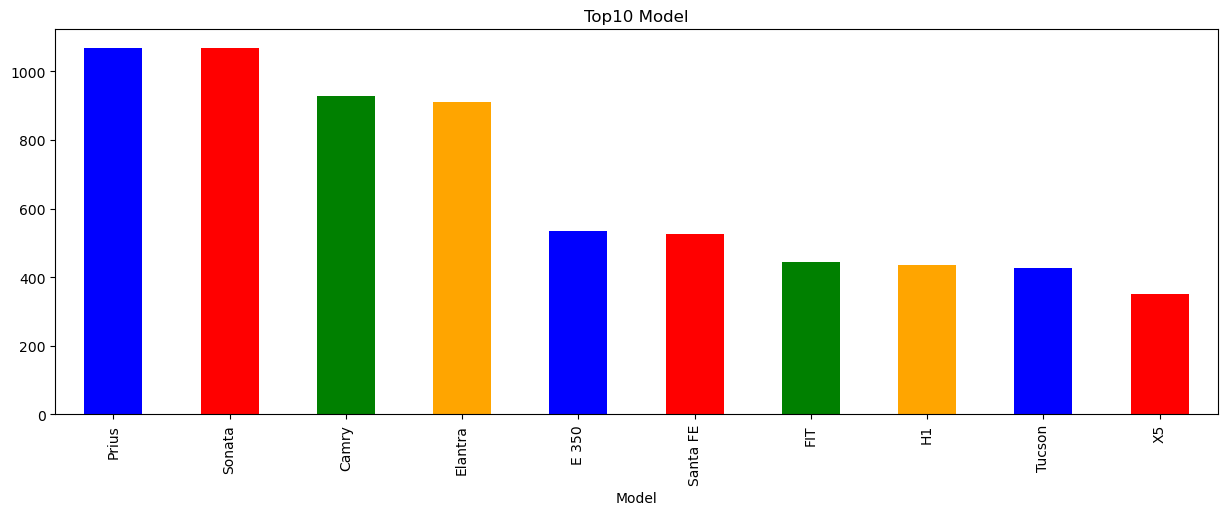

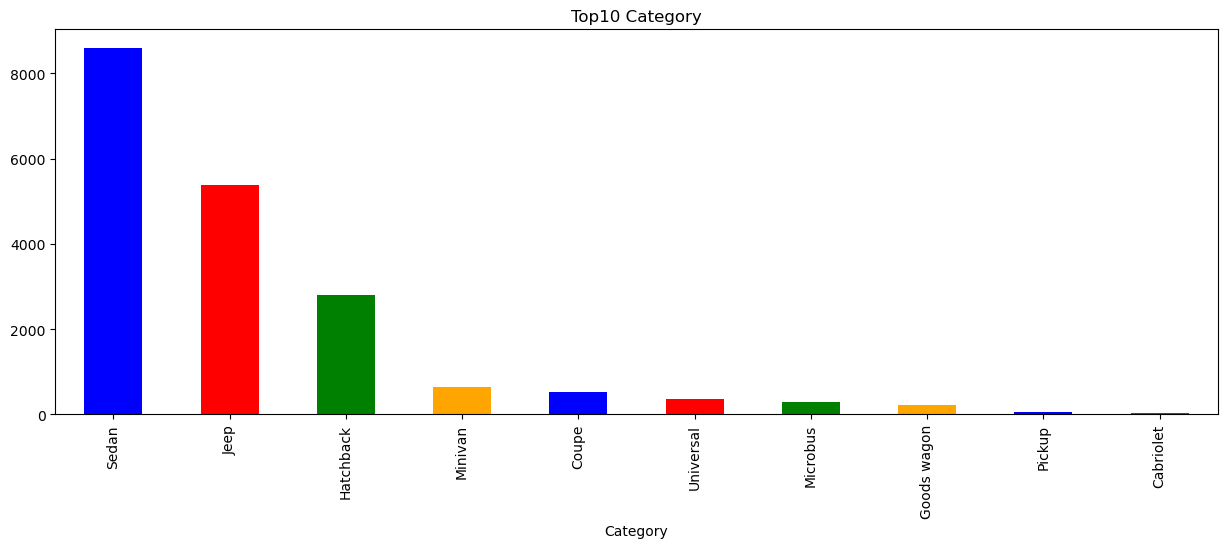

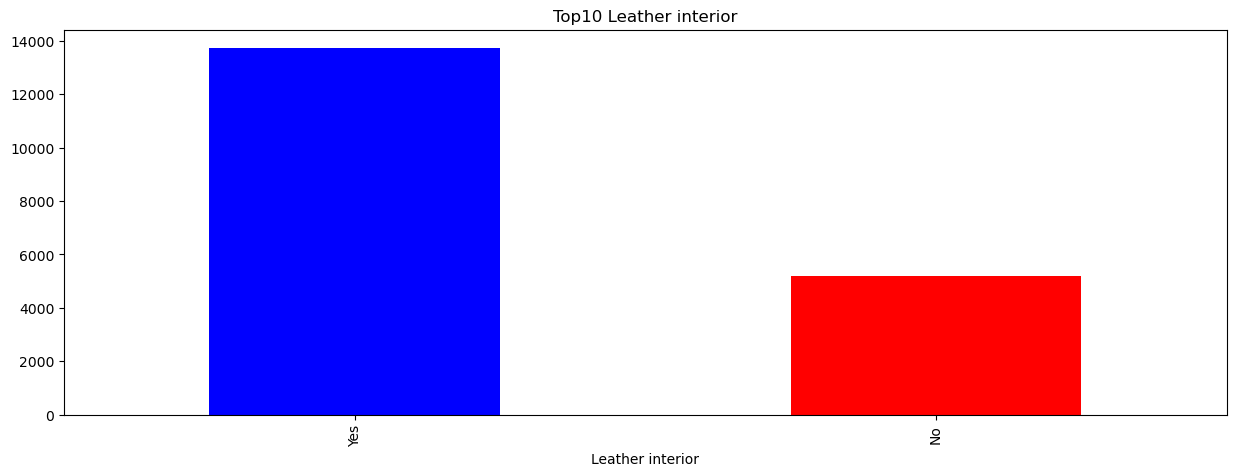

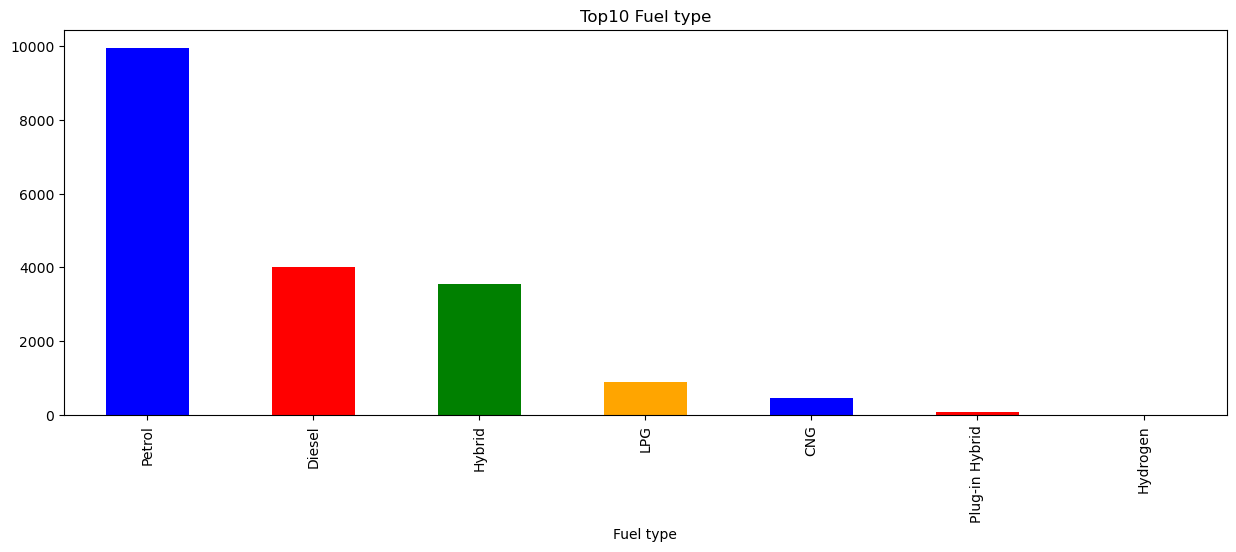

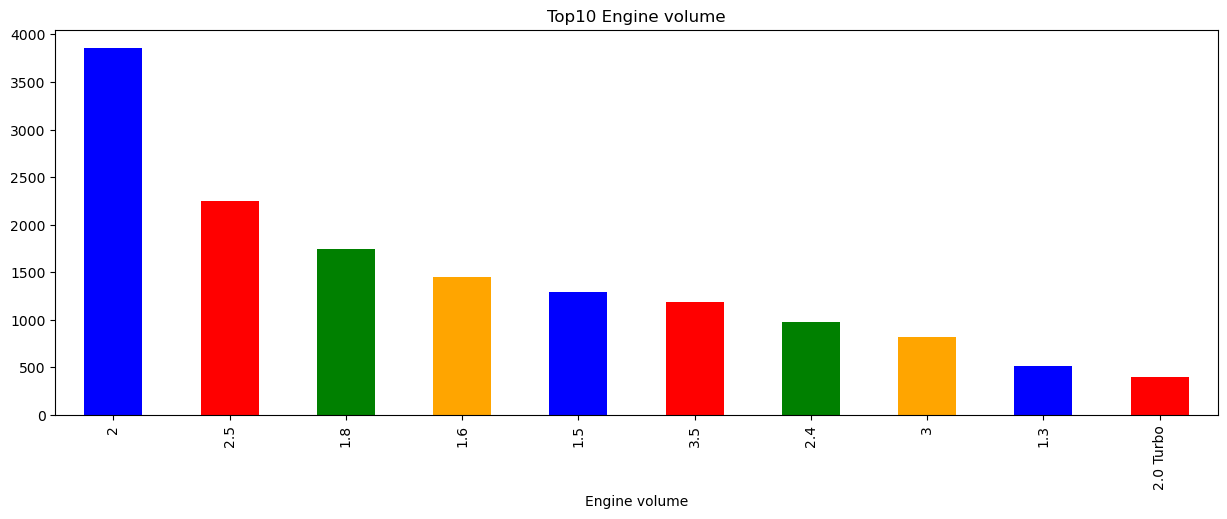

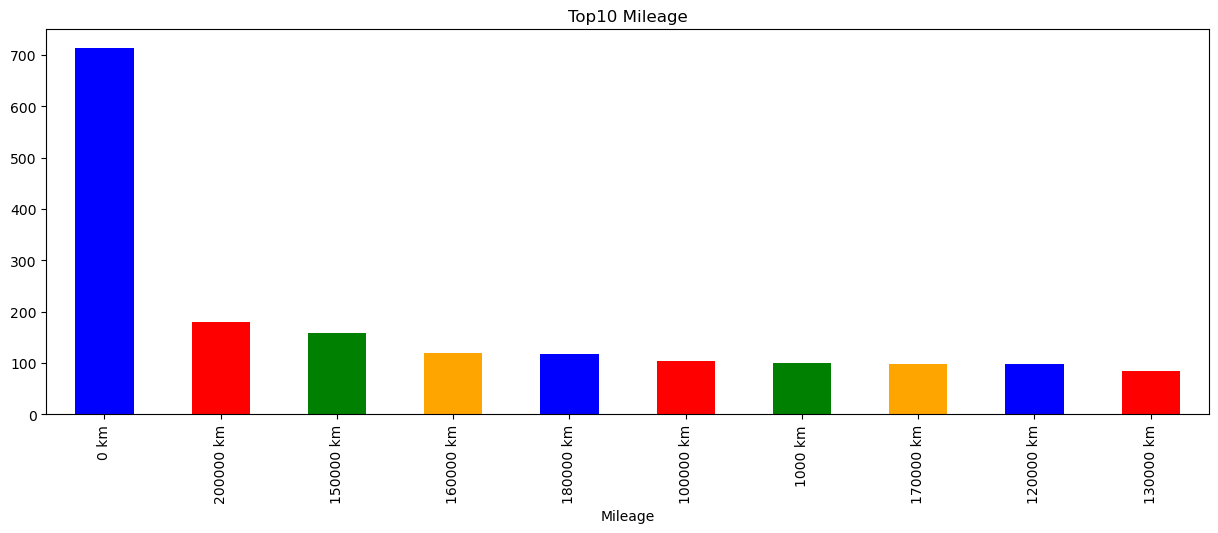

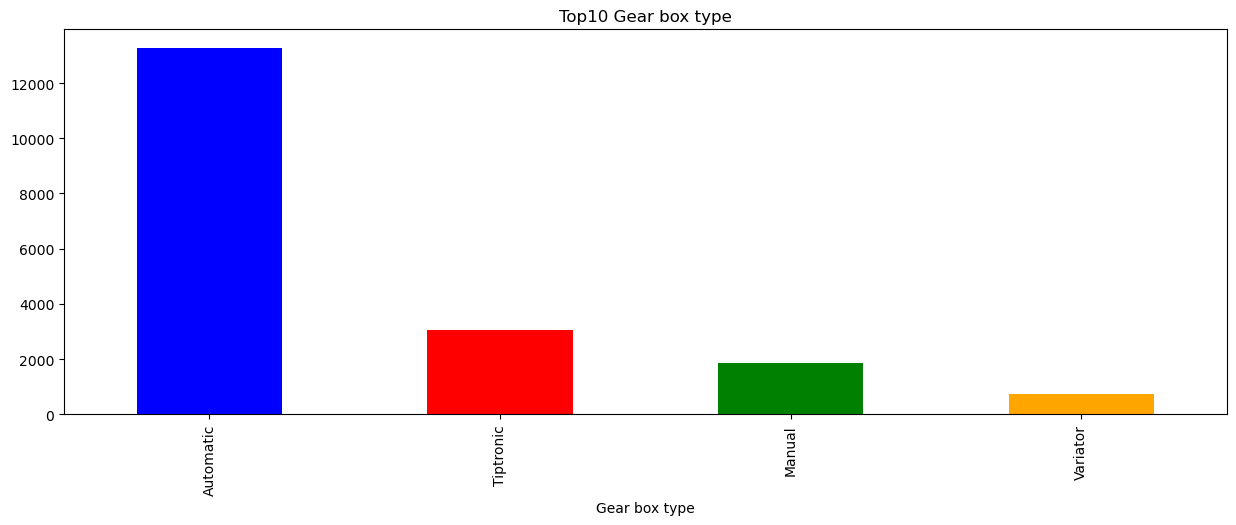

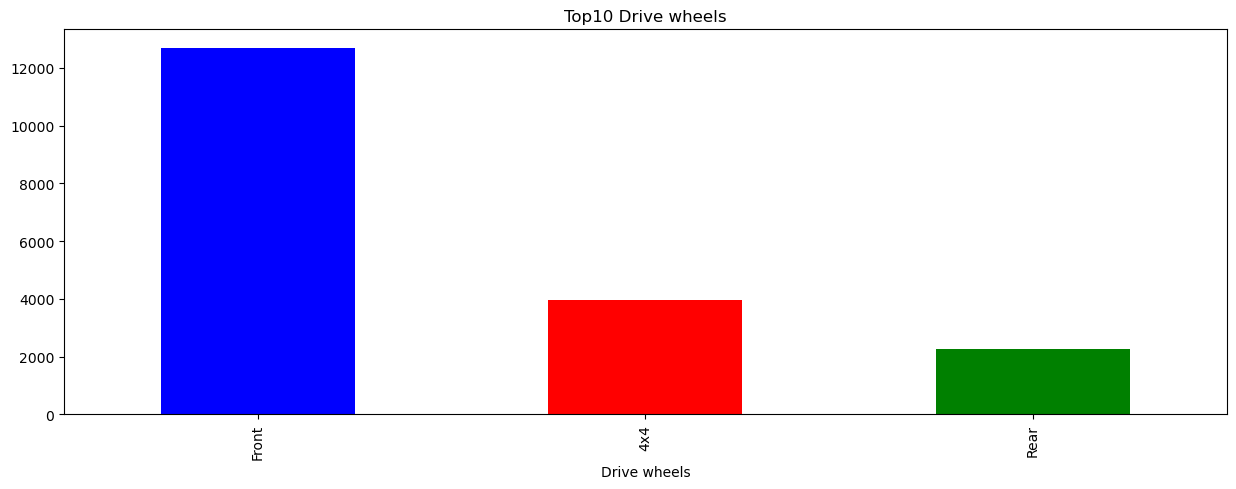

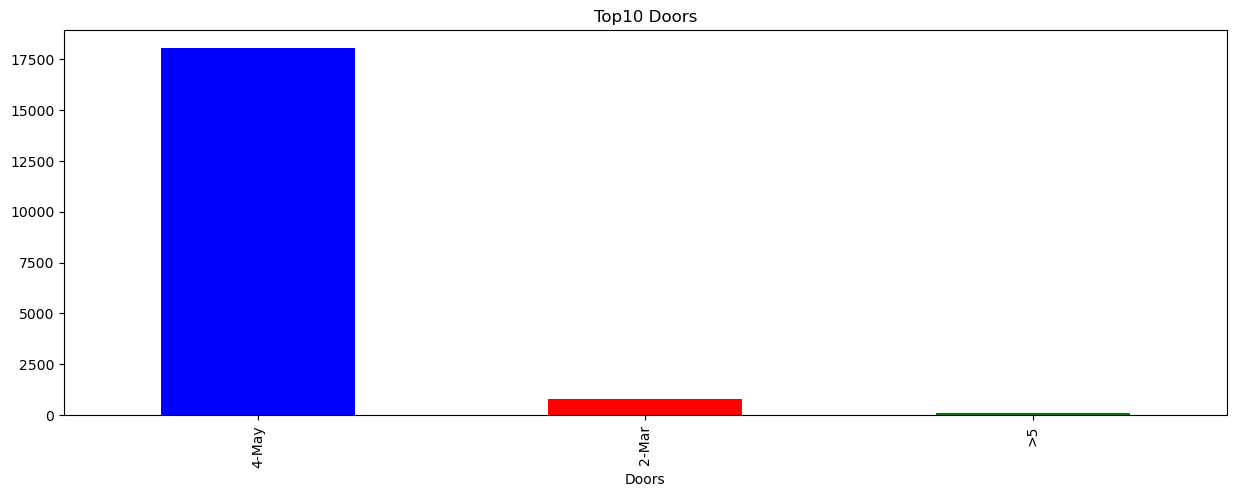

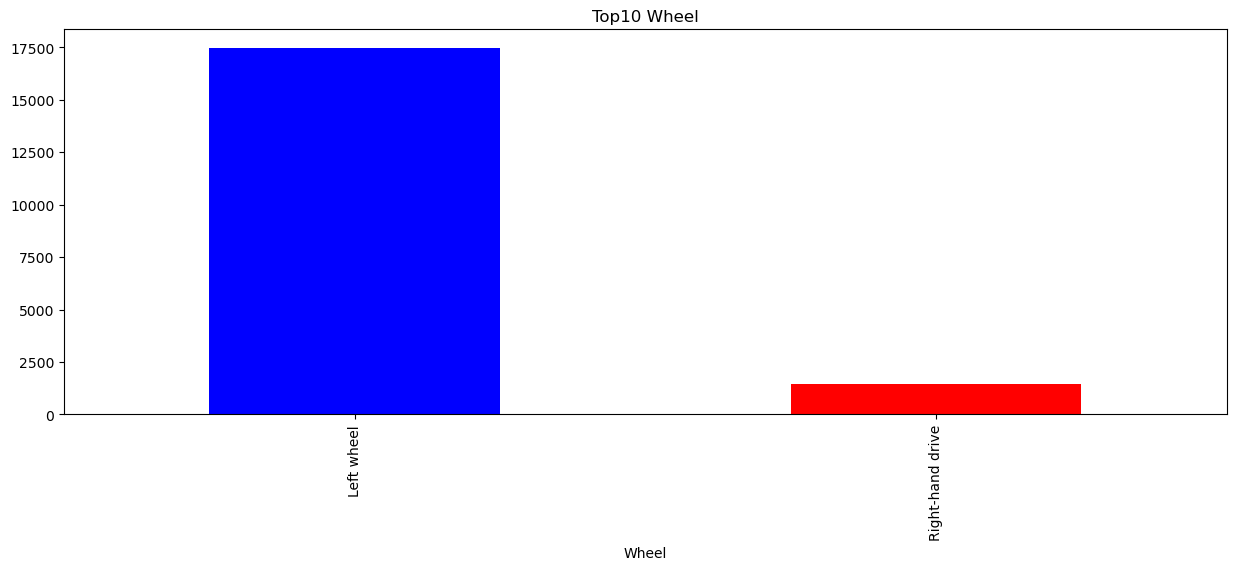

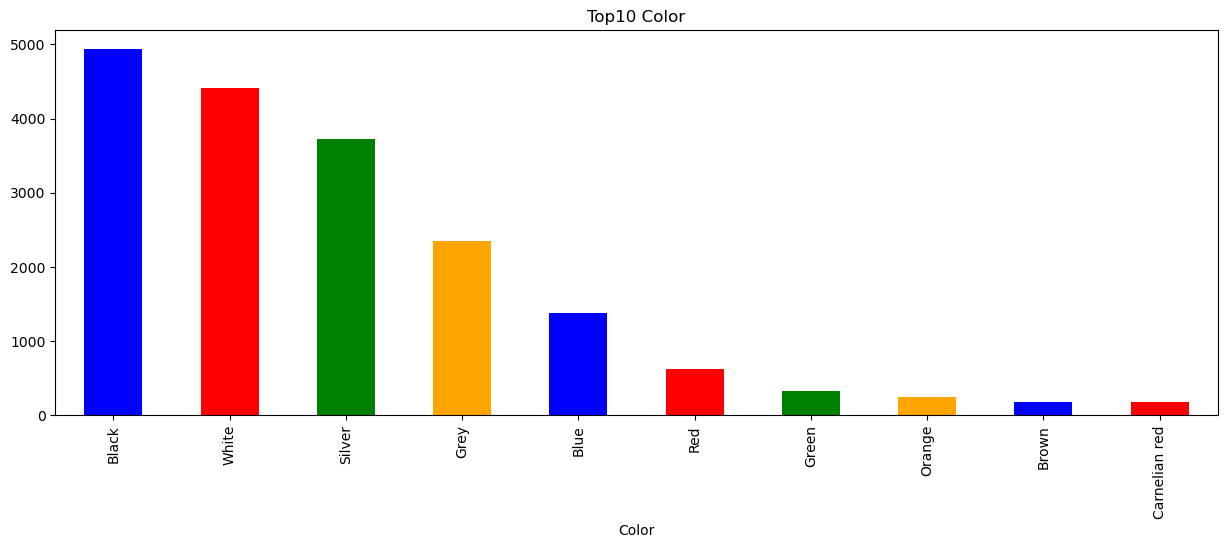

In [26]:
for col in obj:
    plt.figure(figsize=(15,5))
    Top10=df[col].value_counts()[:10]
    colors=['blue','red','green','orange']
    Top10.plot(kind='bar',color=colors)
    plt.title('Top10'+' '+col)
    plt.show()

### Processing Data

In [27]:
# Date
from datetime import datetime
dtime=datetime.now()
# we will calcul age of cars
df['Age_of_Cars']=dtime.year-df['Prod_year']
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age_of_Cars
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,14
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,13
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,18
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,13
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,10


In [28]:
df=df.drop(['ID','Doors','Prod_year'],axis=1)

In [29]:
df['Levy'].head()

0    1399
1    1018
2       -
3     862
4     446
Name: Levy, dtype: object

In [30]:
# replace (-) by (0) in Levy column
df['Levy'].replace({'-':'0'},inplace=True)
df['Levy']=df['Levy'].astype(float)


C:\Users\RPC\AppData\Local\Temp\ipykernel_1484\3721481093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({'-':'0'},inplace=True)


In [31]:
df['Levy'].replace({0.0:np.nan},inplace=True)

C:\Users\RPC\AppData\Local\Temp\ipykernel_1484\3766478995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({0.0:np.nan},inplace=True)


In [32]:
m=df['Levy'].mean()
df['Levy'].fillna(m,inplace=True)
df.isna().sum()

C:\Users\RPC\AppData\Local\Temp\ipykernel_1484\3650531552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].fillna(m,inplace=True)


Price               0
Levy                0
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
Age_of_Cars         0
dtype: int64

In [33]:
df['Levy'].value_counts()

Levy
906.299205     5709
765.000000      482
891.000000      453
639.000000      403
640.000000      398
               ... 
3156.000000       1
2908.000000       1
1279.000000       1
1719.000000       1
1901.000000       1
Name: count, Length: 559, dtype: int64

In [34]:
df['Mileage'].head()

0    186005 km
1    192000 km
2    200000 km
3    168966 km
4     91901 km
Name: Mileage, dtype: object

In [35]:
# replace (km) by ('') in Mileage column
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=df['Mileage'].astype(float)


In [36]:
df['Mileage'].head()

0    186005.0
1    192000.0
2    200000.0
3    168966.0
4     91901.0
Name: Mileage, dtype: float64

In [37]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [38]:
# replace (Turbo) by ('') in Engine volume column
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)


In [39]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  float64
 9   Cylinders         18924 non-null  int64  
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age_of_Cars       18924 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usa

### Detect Outliers

outliers > IQE > outliers

In [41]:
numerical_data=df.select_dtypes(exclude='object')
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]


Total of outliers in Price are   :   1055--5.57%
Total of outliers in Levy are   :   3103--16.4%
Total of outliers in Engine volume are   :   1358--7.18%
Total of outliers in Mileage are   :   635--3.36%
Total of outliers in Cylinders are   :   4765--25.18%
Total of outliers in Airbags are   :   0--0.0%
Total of outliers in Age_of_Cars are   :   962--5.08%


In [42]:
df.shape

(10899, 16)

### Transform Data

In [43]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

objj=df.select_dtypes(include='object')
non_objj = df.select_dtypes(exclude='object')

for i in range(0,objj.shape[1]):
    objj.iloc[:,i]=label.fit_transform(objj.iloc[:,i])

objj = objj.astype(int)

dff = pd.concat([non_objj,objj],axis=1)
dff.head()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age_of_Cars,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,8467,906.299205,1.3,200000.0,4,2,18,17,362,3,0,4,3,1,1,1
3,3607,862.000000,2.5,168966.0,4,0,13,13,349,4,1,2,0,0,0,14
5,39493,891.000000,2.0,160931.0,4,4,8,18,688,4,1,1,0,1,0,14
6,1803,761.000000,1.8,258909.0,4,12,14,45,625,3,1,2,0,1,0,14
7,549,751.000000,2.4,216118.0,4,12,11,18,703,8,1,4,0,1,0,7


In [44]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10899 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             10899 non-null  int64  
 1   Levy              10899 non-null  float64
 2   Engine volume     10899 non-null  float64
 3   Mileage           10899 non-null  float64
 4   Cylinders         10899 non-null  int64  
 5   Airbags           10899 non-null  int64  
 6   Age_of_Cars       10899 non-null  int64  
 7   Manufacturer      10899 non-null  int32  
 8   Model             10899 non-null  int32  
 9   Category          10899 non-null  int32  
 10  Leather interior  10899 non-null  int32  
 11  Fuel type         10899 non-null  int32  
 12  Gear box type     10899 non-null  int32  
 13  Drive wheels      10899 non-null  int32  
 14  Wheel             10899 non-null  int32  
 15  Color             10899 non-null  int32  
dtypes: float64(3), int32(9), int64(4)
memory usag

In [45]:
df['Levy'].value_counts()

Levy
906.299205     2979
640.000000      388
639.000000      323
891.000000      322
765.000000      310
               ... 
666.000000        1
748.000000        1
683.000000        1
1030.000000       1
875.000000        1
Name: count, Length: 197, dtype: int64

### Creat Model

In [46]:
x=dff.drop('Price',axis=1) 
y=dff['Price']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [48]:
score=[]
r_2=[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    SCORE=model.score(x_test,y_test)
    R2 = r2_score(y_test,pred)
    RMSE = math.sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    score.append(SCORE)
    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [49]:
m1=LinearRegression()
m2=XGBRegressor()
m3=RandomForestRegressor()
m4=DecisionTreeRegressor()
m5=SVR()
m6=GradientBoostingRegressor()

In [50]:
Algorithms = ['LinearRegression','XGBRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR','GradientBoostingRegressor']

In [51]:
reg(m1)
reg(m2)
reg(m3)
reg(m4)
reg(m5)
reg(m6)

In [52]:
result=pd.DataFrame({'Algorithms':Algorithms,'Score':score,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,Score,R2,rmse,mae
0,LinearRegression,0.266916,0.266916,9525.046185,7436.961080
1,XGBRegressor,0.766570,0.766570,5374.882298,3544.897802
2,RandomForestRegressor,0.779208,0.779208,5227.349732,3327.447591
3,DecisionTreeRegressor,0.608769,0.608769,6958.357204,4149.804445
4,SVR,0.000036,0.000036,11124.549054,8641.401641
5,GradientBoostingRegressor,0.675745,0.675745,6334.808672,4622.434985


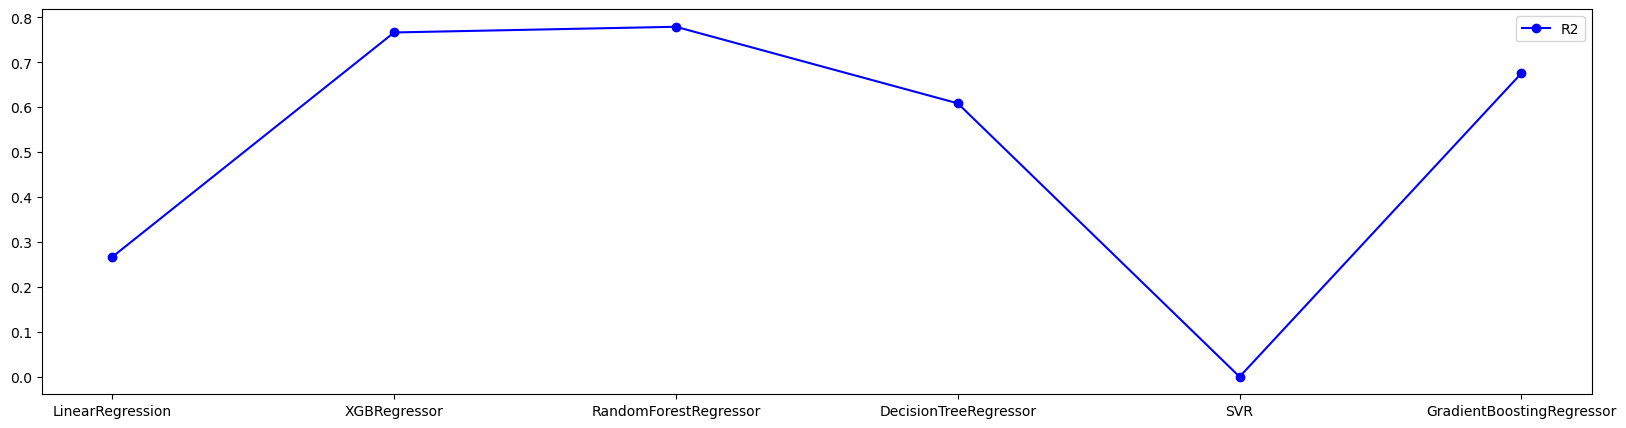

In [67]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(result.Algorithms,result.R2,label='R2',c='b',marker='o')
plt.legend()
plt.show()


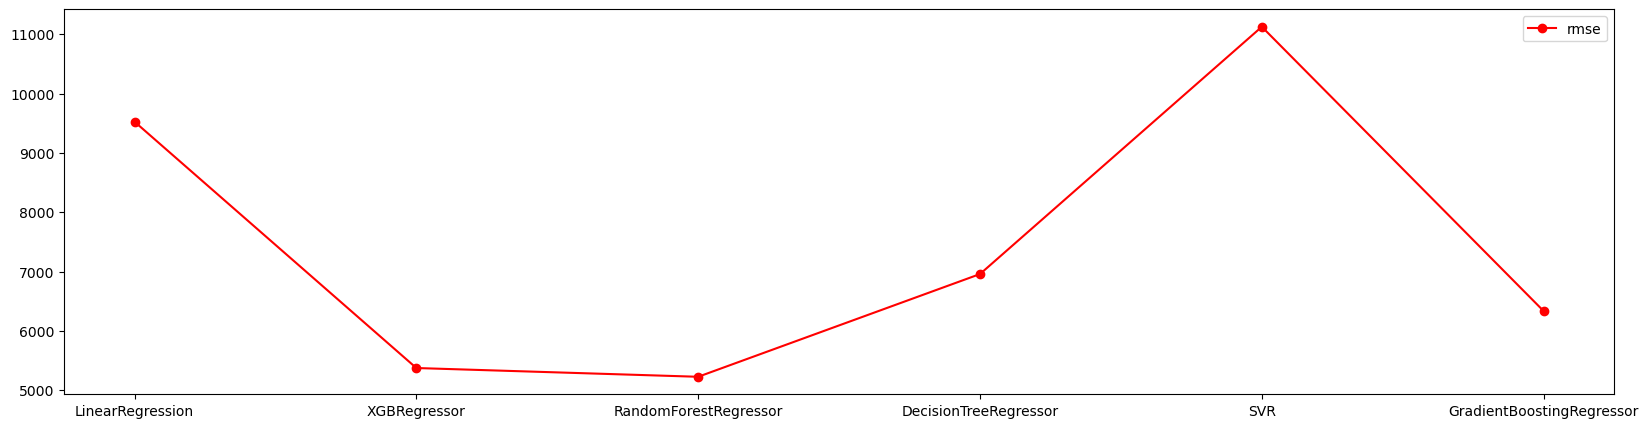

In [64]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(result.Algorithms,result.rmse,label='rmse',c='r',marker='o')
plt.legend()
plt.show()

### Using my model for predict new data

In [68]:
import pickle

In [72]:
car_price_pred='car_price_pred.sav'

In [73]:
pickle.dump(m3,open(car_price_pred,'wb'))